In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.datasets import cifar10

from tensorflow.keras.layers import Conv2D, MaxPool2D


from tensorflow.keras.utils import to_categorical


In [15]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
'''print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)'''

'print(X_train.shape)\nprint(y_train.shape)\nprint(X_test.shape)\nprint(y_test.shape)'

In [16]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [14]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [17]:
X_train_resized = X_train_scaled.reshape((60000, 28, 28, 1))
X_test_resizezd = X_test_scaled.reshape((10000, 28, 28, 1))

In [18]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [19]:
model_conv = Sequential([
    Conv2D(64, kernel_size =(3, 3), padding = 'same', strides  = (2, 2), input_shape = (28, 28, 1)), #필터 64개, 커널사이즈5x5
    MaxPool2D((2, 2)),
    Conv2D(32, kernel_size = (3, 3), padding = 'valid'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model_conv.summary()

model_conv.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
history = model_conv.fit(X_train_scaled, y_train_ohe, epochs = 10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,770 (116.29 KB)

 Trainable params: 29,770 (116.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.7089 - loss: 0.8135
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8440 - loss: 0.4272
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.8651 - loss: 0.3676
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8820 - loss: 0.3257
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8860 - loss: 0.3079
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.8943 - loss: 0.2865
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8973 - loss: 0.2769
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9028 - loss: 0.2583
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.9076 - loss: 0.2457
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - accuracy: 0.9103 - loss: 0.2363


In [20]:
history2 = model_conv.fit(X_test_scaled, y_test_ohe, epochs = 10)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8863 - loss: 0.3272
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9049 - loss: 0.2686
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9111 - loss: 0.2459
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9181 - loss: 0.2245
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9299 - loss: 0.1883
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9370 - loss: 0.1740
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9457 - loss: 0.1514
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9413 - loss: 0.1499
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9565 - loss: 0.1249
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9622 - loss: 0.1118


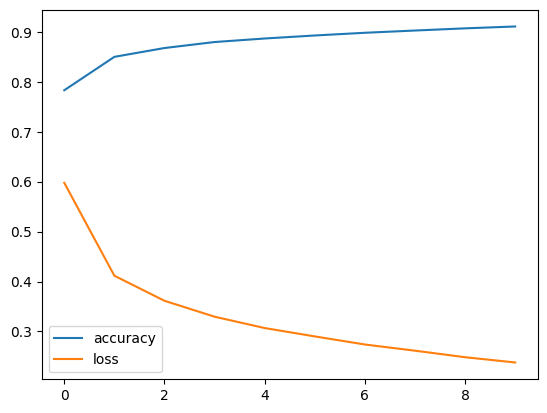

In [21]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.plot(acc, label = 'accuracy')
plt.plot(loss, label = 'loss')
plt.legend()
plt.show()